# program #1: How much space do NYCHA residents have in their apartments? 
In this assigment you'll be exploring data of the NYC Housing Authority (NYCHA). You'll work on data extraction, ingestion, and transformation. You'll then interrogate the data via summary statistics and visualization. And finally you will build a series of constant models and think about ways to select the best model from a finite set of candidates.

## Section 0: download data and get notebook set up
First off, go to https://data.cityofnewyork.us/Housing-Development/NYCHA-Development-Data-Book/evjd-dqpz/about_data and "Export" your data as "CSV". Save/move the `NYCHA_Development_Data_Book_20240903.csv` file into a convenient location (e.g. same as this notebook).

Now let's import a few libraries we'll be using throughout this notebook: numpy, pandas, pyplot, and seaborn.

In [54]:
# libraries for data manipulation
import numpy as np
import pandas as pd

# libraries for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# jupyter extension to render charts inline
%matplotlib inline

## Section 1: Data loading and exploration

**Task 1.1: Read in the data in the CSV as-is into the variable `raw_df`.**

In [55]:
# read in the data in the CSV as-is into the variable raw_df.
raw_df = pd.read_csv('NYCHA_Development_Data_Book_20240903.csv')

**Task 1.2: Display the columns in `raw_df`.**

In [56]:
# display the columns in raw_df
raw_df.columns

Index(['DATA AS OF', 'DEVELOPMENT', 'HUD AMP#', 'TDS#', 'CONSOLIDATED TDS#',
       'DEVELOPMENT EDP#', 'OPERATING EDP#', 'HUD #', 'PROGRAM', 'METHOD',
       'TYPE', 'NUMBER OF SECTION 8 TRANSITION APARTMENTS',
       'NUMBER OF CURRENT APARTMENTS', 'TOTAL NUMBER OF APARTMENTS',
       'NUMBER OF RENTAL ROOMS', 'AVG NO R/R PER APARTMENT',
       'POPULATION SECTION 8 TRANSITION', 'POPULATION PUBLIC HOUSING',
       'TOTAL POPULATION', 'TOTAL # OF FIXED INCOME HOUSEHOLD',
       'PERCENT FIXED INCOME HOUSEHOLDS', 'NUMBER OF RESIDENTIAL BLDGS',
       'NUMBER OF NON-RESIDENTIAL BLDGS', 'NUMBER OF STAIRHALLS',
       'NUMBER OF STORIES', 'TOTAL AREA SQ FT', 'ACRES', 'NET DEV AREA SQ FT',
       'EXCLUDING PARK ACRES', 'BLDG COVERAGE SQ FT', 'CUBAGE CU FT',
       'BLDG COVERAGE %', 'DENSITY', 'DEVELOPMENT COST', 'PER RENTAL ROOM',
       'AVG MONTHLY GROSS RENT', 'LOCATION STREET A', 'LOCATION STREET B',
       'LOCATION STREET C', 'LOCATION STREET D', 'BOROUGH',
       'COMMUNITY DISTIR

**Task 1.3: Show the dataframe `.head()` and take a look at the first few rows.**

In [57]:
# show dataframe head
raw_df.head()

,DATA AS OF,DEVELOPMENT,HUD AMP#,TDS#,CONSOLIDATED TDS#,DEVELOPMENT EDP#,OPERATING EDP#,HUD #,PROGRAM,METHOD,...,US CONGRESSIONAL DISTRICT,NY STATE SENATE DISTRICT,NY STATE ASSEMBLY DISTRICT,NY CITY COUNCIL DISTRICT,COMPLETION DATE,FEDERALIZED DEVELOPMENT,SENIOR DEVELOPMENT,ELECTRICITY PAID BY RESIDENTS,PRIVATE MANAGEMENT,RAD TRANSFERRED DATE
0,1/1/2024,1010 EAST 178TH STREET,NY005011330,180,180,289,289,NY005090,FEDERAL,CONVENTIONAL,...,15,32,87,15,3/31/1971,NaN,NaN,NaN,NaN,NaN
1,1/1/2024,1162-1176 WASHINGTON AVENUE,NY005013080,233,308,354,344,NY005138,FEDERAL,TURNKEY,...,15,32,79,16,12/31/1975,NaN,NaN,NaN,NaN,NaN
2,1/1/2024,131 SAINT NICHOLAS AVENUE,NY005010970,154,97,264,261,NY005065,FEDERAL,CONVENTIONAL,...,13,30,70,9,3/31/1965,NaN,NaN,NaN,NaN,NaN
3,1/1/2024,1471 WATSON AVENUE,NY005010670,214,67,332,222,NY005162,FEDERAL,TURNKEY,...,14,32,85,17,12/31/1970,NaN,NaN,NaN,NaN,NaN
4,1/1/2024,154 WEST 84TH STREET,NY005013590,359,359,840,840,NY005270,FEDERAL,TURNKEY,...,12,47,69,6,3/31/1996,NaN,NaN,YES,YES,NaN


**Task 1.4: Take a moment to look at the columns and the table head. What stands out to you from this visual inspection? Write down at least three observations. You can comment on things like the data format, the granularity, or whatever you find interesting.**

> - 1.4 #1: The columns command returns an index of the columns in the csv, which has a string data type
> - 1.4 #2: The dataframe cuts out a lot of the middle columns, displaying the first few and last few instead of the full 52 columns
> - 1.4 #3: The dataframe has a lot of NaNs in the last few columns, the csv contains no values for them meaning they are either 'Yes' or no value (NaN)

Now let's start focusing on the central question: how much "space" do NYCHA residents have in their homes, depending on what "development" they're in? To do so we let's concentrate in the following columns:

- `"DEVELOPMENT"`
- `"TOTAL POPULATION"`
- `"NUMBER OF CURRENT APARTMENTS"`
- `"AVG MONTHLY GROSS RENT"`
- `"NET DEV AREA SQ FT"`
 
_Note: `"AVG MONTHLY GROSS RENT"` isn't quite necessary to expore this question but it will be a good cross-check variable to look alongside._

**Task 1.5: Take a look at them. Preview only those columns in the dataframe.**

In [58]:
# preview subset of columns
filtered_df = raw_df[['DEVELOPMENT', 'TOTAL POPULATION', 'NUMBER OF CURRENT APARTMENTS', 'AVG MONTHLY GROSS RENT', 'NET DEV AREA SQ FT']]
filtered_df 

,DEVELOPMENT,TOTAL POPULATION,TOTAL NUMBER OF APARTMENTS,AVG MONTHLY GROSS RENT,NET DEV AREA SQ FT
0,1010 EAST 178TH STREET,413,220,$488,"88,172"
1,1162-1176 WASHINGTON AVENUE,141,66,$502,"18,987"
2,131 SAINT NICHOLAS AVENUE,157,100,$514,"29,359"
3,1471 WATSON AVENUE,116,96,$517,"39,937"
4,154 WEST 84TH STREET,65,35,$698,"9,621"
...,...,...,...,...,...
341,WASHINGTON HEIGHTS REHAB PHASE IV (D),60,32,$578,"8,743"
342,WEEKSVILLE GARDENS,697,257,$619,"141,365"
343,WILLIAMS PLAZA,"1,290",577,$496,"242,859"
344,WILLIAMSBURG,"2,873","1,621",$508,"927,103"


Hmm that looks nice but maybe not so workable --column names are long, they have spaces in them, and nobody likes to type uppercase... plus those numeric values have non-numeric characters in them...

**Task 1.6: So define 6 _new_ columns in `raw_df` so that**

- **column names are snake case**
  - `"development"`
  - `"boro"`
  - `"total_pop"`
  - `"num_apts"`
  - `"avg_monthly_rent"`
  - `"net_sqft"`
- **numeric columns are of `float` type

**_Hint: you can check the tdataframe column types using the `.dtypes` attribute, and you can use the .astype()` method to cast types_.**

In [59]:
# define new columns
raw_df["development"] = raw_df["DEVELOPMENT"]

filtered_df = filtered_df.rename(columns = {'DEVELOPMENT' : 'development', 
                                            'TOTAL POPULATION' : 'total_pop', 
                                            'TOTAL NUMBER OF APARTMENTS' : 'num_apts', 
                                            'AVG MONTHLY GROSS RENT' : 'avg_monthly_rent', 
                                            'NET DEV AREA SQ FT' : 'net_sqft'})
filtered_df




,development,total_pop,num_apts,avg_monthly_rent,net_sqft
0,1010 EAST 178TH STREET,413,220,$488,"88,172"
1,1162-1176 WASHINGTON AVENUE,141,66,$502,"18,987"
2,131 SAINT NICHOLAS AVENUE,157,100,$514,"29,359"
3,1471 WATSON AVENUE,116,96,$517,"39,937"
4,154 WEST 84TH STREET,65,35,$698,"9,621"
...,...,...,...,...,...
341,WASHINGTON HEIGHTS REHAB PHASE IV (D),60,32,$578,"8,743"
342,WEEKSVILLE GARDENS,697,257,$619,"141,365"
343,WILLIAMS PLAZA,"1,290",577,$496,"242,859"
344,WILLIAMSBURG,"2,873","1,621",$508,"927,103"


**Task 1.7: Now that those are clean, add 4 new columns with new variables/features. Then select your 10 newly defined columns and preview the dataframe.**
- `""ppl_per_apt"`: people per apartment
- `"sqft_per_apt"`: square footage per apartment
- `"sqft_per_person"`: square footage per person
- `"rent_per_sqft"`: rent per square footage

In [60]:
# compute new derived columns

# Remove whitespace and non-numerica characters, then convert to numeric
for col in ['net_sqft', 'num_apts', 'total_pop', 'avg_monthly_rent']:
    filtered_df[col] = filtered_df[col].str.strip().str.replace(r'[^0-9.]+', '', regex=True)
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

filtered_df['sqft_per_apt'] = (filtered_df['net_sqft'] / filtered_df['num_apts'])
filtered_df['sqft_per_person'] = (filtered_df['net_sqft'] / filtered_df['total_pop'])
filtered_df['rent_per_sqft'] = (filtered_df['avg_monthly_rent'] / filtered_df['net_sqft'])
filtered_df['ppl_per_apt'] = (filtered_df['total_pop'] / filtered_df['num_apts'])

In [61]:
# preview all the new columns
filtered_df

,development,total_pop,num_apts,avg_monthly_rent,net_sqft,sqft_per_apt,sqft_per_person,rent_per_sqft,ppl_per_apt
0,1010 EAST 178TH STREET,413.0,220.0,488.0,88172.0,400.781818,213.491525,0.005535,1.877273
1,1162-1176 WASHINGTON AVENUE,141.0,66.0,502.0,18987.0,287.681818,134.659574,0.026439,2.136364
2,131 SAINT NICHOLAS AVENUE,157.0,100.0,514.0,29359.0,293.590000,187.000000,0.017507,1.570000
3,1471 WATSON AVENUE,116.0,96.0,517.0,39937.0,416.010417,344.284483,0.012945,1.208333
4,154 WEST 84TH STREET,65.0,35.0,698.0,9621.0,274.885714,148.015385,0.072550,1.857143
...,...,...,...,...,...,...,...,...,...
341,WASHINGTON HEIGHTS REHAB PHASE IV (D),60.0,32.0,578.0,8743.0,273.218750,145.716667,0.066110,1.875000
342,WEEKSVILLE GARDENS,697.0,257.0,619.0,141365.0,550.058366,202.819225,0.004379,2.712062
343,WILLIAMS PLAZA,1290.0,577.0,496.0,242859.0,420.899480,188.262791,0.002042,2.235702
344,WILLIAMSBURG,2873.0,1621.0,508.0,927103.0,571.932758,322.695092,0.000548,1.772363


Excellent!

**Task 1.8: Now let's move all of those steps (loading, transforming, selecting) into a single function. Define `read_and_transform_nycha_data(filepath)` that returns the same dataframe you just previewed. Make sure to complete the function docstrings using the [reST style](https://stackoverflow.com/a/24385103).**

In [62]:
# define function to load and transform the NYCHA data

# function to load, transform, select, and calculate specific NYCHA data
def read_and_transform_nycha_data(filepath: str) -> pd.DataFrame:
    """
    :param filepath: A string param that represents the path to the file
    :returns: Returns a dataframe of NYCHA data
    """
    df = pd.read_csv(filepath)
    df = df[['DEVELOPMENT', 'BOROUGH' ,'TOTAL POPULATION', 'TOTAL NUMBER OF APARTMENTS', 'AVG MONTHLY GROSS RENT', 'NET DEV AREA SQ FT']]
    df = df.rename(columns = {'DEVELOPMENT' : 'development', 
                              'BOROUGH' : 'boro',
                              'TOTAL POPULATION' : 'total_pop', 
                              'TOTAL NUMBER OF APARTMENTS' : 'num_apts', 
                              'AVG MONTHLY GROSS RENT' : 'avg_monthly_rent', 
                              'NET DEV AREA SQ FT' : 'net_sqft'})
    
    for col in ['net_sqft', 'num_apts', 'total_pop', 'avg_monthly_rent']:
        df[col] = df[col].str.strip().str.replace(r'[^0-9.]+', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['sqft_per_apt'] = (df['net_sqft'] / df['num_apts'])
    df['sqft_per_person'] = (df['net_sqft'] / df['total_pop'])
    df['rent_per_sqft'] = (df['avg_monthly_rent'] / df['net_sqft'])
    df['ppl_per_apt'] = (df['total_pop'] / df['num_apts'])
        

    return df[[
        "development", "boro", "total_pop", "num_apts",
        "avg_monthly_rent", "net_sqft", 
        "ppl_per_apt", "sqft_per_apt", "sqft_per_person", "rent_per_sqft", 
    ]]

**Task 1.9: Finally use your function to read and transform the raw data into `nycha_df` and preview the newly created dataframe.**

In [63]:
# load and transform NYCHA data into nycha_df
nycha_df = read_and_transform_nycha_data('NYCHA_Development_Data_Book_20240903.csv')
nycha_df

,development,boro,total_pop,num_apts,avg_monthly_rent,net_sqft,ppl_per_apt,sqft_per_apt,sqft_per_person,rent_per_sqft
0,1010 EAST 178TH STREET,BRONX,413.0,220.0,488.0,88172.0,1.877273,400.781818,213.491525,0.005535
1,1162-1176 WASHINGTON AVENUE,BRONX,141.0,66.0,502.0,18987.0,2.136364,287.681818,134.659574,0.026439
2,131 SAINT NICHOLAS AVENUE,MANHATTAN,157.0,100.0,514.0,29359.0,1.570000,293.590000,187.000000,0.017507
3,1471 WATSON AVENUE,BRONX,116.0,96.0,517.0,39937.0,1.208333,416.010417,344.284483,0.012945
4,154 WEST 84TH STREET,MANHATTAN,65.0,35.0,698.0,9621.0,1.857143,274.885714,148.015385,0.072550
...,...,...,...,...,...,...,...,...,...,...
341,WASHINGTON HEIGHTS REHAB PHASE IV (D),MANHATTAN,60.0,32.0,578.0,8743.0,1.875000,273.218750,145.716667,0.066110
342,WEEKSVILLE GARDENS,BROOKLYN,697.0,257.0,619.0,141365.0,2.712062,550.058366,202.819225,0.004379
343,WILLIAMS PLAZA,BROOKLYN,1290.0,577.0,496.0,242859.0,2.235702,420.899480,188.262791,0.002042
344,WILLIAMSBURG,BROOKLYN,2873.0,1621.0,508.0,927103.0,1.772363,571.932758,322.695092,0.000548


## Section 2: Exploratory data analysis
### Summary statistics

**Task 2.1: Make a summary of the numeric columns in `nycha_df` using the dataframe [`describe()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) and preview it.**

In [64]:
# display summary
nycha_df.describe()

,total_pop,num_apts,avg_monthly_rent,net_sqft,ppl_per_apt,sqft_per_apt,sqft_per_person,rent_per_sqft
count,338.000000,344.000000,338.000000,3.440000e+02,338.000000,344.000000,338.000000,338.000000
mean,1080.926036,532.409884,574.991124,3.025852e+05,1.939453,661.167243,398.317452,0.011712
std,1146.554629,558.107457,121.271442,3.813772e+05,0.497621,922.070514,780.085493,0.026941
min,3.000000,5.000000,229.000000,3.098000e+03,0.300000,83.686667,56.568627,0.000282
25%,216.500000,125.000000,530.000000,4.521125e+04,1.776529,323.148416,171.522437,0.001234
50%,549.000000,271.000000,583.000000,1.344110e+05,2.011832,434.983838,224.205534,0.003854
75%,1704.750000,805.250000,624.750000,4.639400e+05,2.196789,677.204463,366.246368,0.012456
max,4577.000000,2545.000000,1180.000000,2.141741e+06,3.651515,8227.600000,9281.200000,0.342479


**Task 2.2: What stands out to you about this summary? Write two or more observations**

> - 2.2 #1: The numbers in the summary have a lot more decimal points
> - 2.2 #2: The summary provides quartile ranges, but there is a large difference between mean and 50% quartile for total population and number of apartments

### Data viz
Now, let's turn to data visualization. We'll use the `seaborn` library, imported under the `sns` alias.

seaborn has a convenient [`pairplot()` function](https://seaborn.pydata.org/generated/seaborn.pairplot.html) which is great for inspecting numeric features. It will make a grid of suplots of all the features with

- histograms in the main diagonal elements
- 2-dimensional scatterplots in the off-diagonal elements

**Task 2.3: Call the function now on `nycha_df`.**

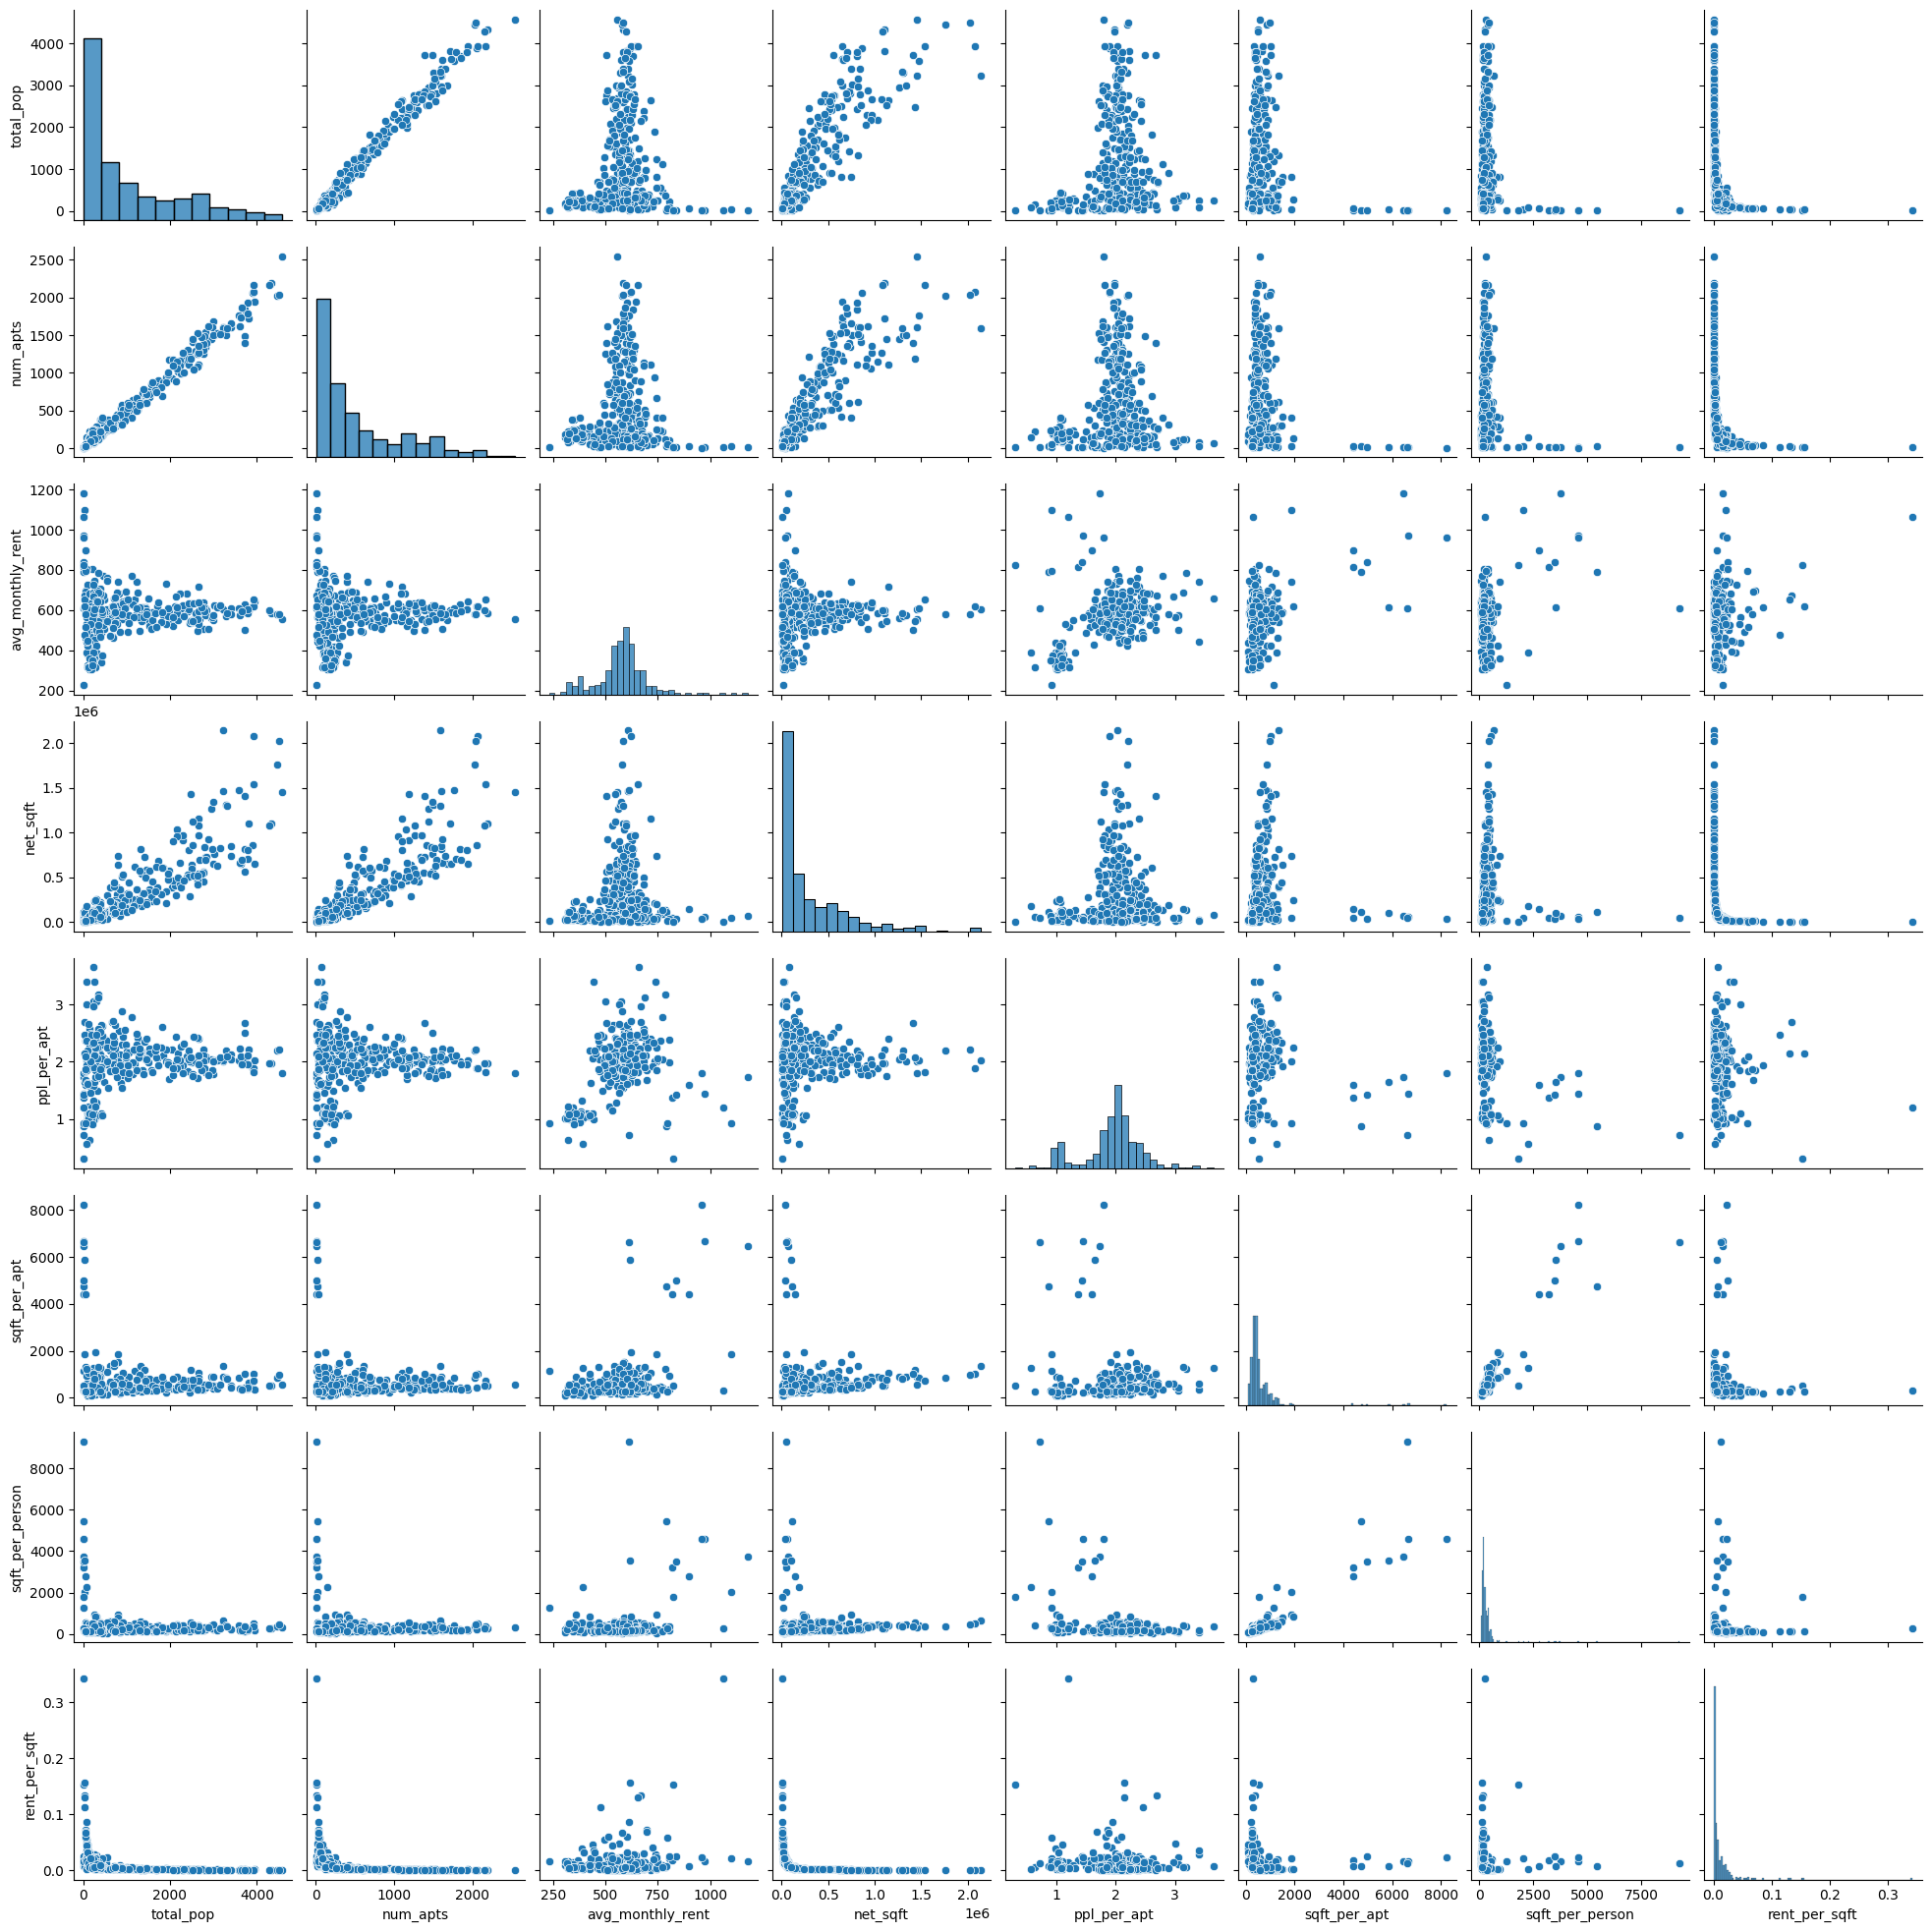

In [65]:
# make pairplots
sns.pairplot(nycha_df)

**Task 2.4: Take a moment to analyze the plots above; what conclusions can you draw? Write two conclusions about the histograms and two about the scatterplots**

> - 2.4 histogram conclusion #1: The histograms seem to only appear when the plot has the same value for the x and y axis, for example the plot for total population and total population. 
> - 2.4 histogram conclusion #2: Most of the histograms seem to have a large spike on the left, followed by a tail going to the right
> - 2.4 scatterplot conclusion #1: Some plots seem to have a linear relationship, like with total population and number of apartments, total population and net square feet, number of apartments and net square feet
> - 2.4 scatterplot conclusion #2: Some of the plots seem to follow the histogram, for example most of the scatterplots with a y axis of rent per square foot seem similar to the rent per squarefoot histogram

Perhaps one of your conclusions was that some pairs of variables are correlated?

**Task 2.5: calculate the [Pearson correlation coefficients](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) using pandas' built-in method and check if your intuition was right.**

In [66]:
# compute correlation coefficients of the numeric columns
nycha_df['total_pop'].corr(nycha_df['num_apts'])

0.9900725742153095

## Square feet per apartment -- constant models

We now turn our attention to a specific question: **how much space do NYCHA residents have in their apartments?**

**Task 3.1: start by looking again a at the probability distribution of the `"sqft_per_person"` variable by plotting a histogram using seaborn's [`displot()` function](https://seaborn.pydata.org/generated/seaborn.displot.html):**

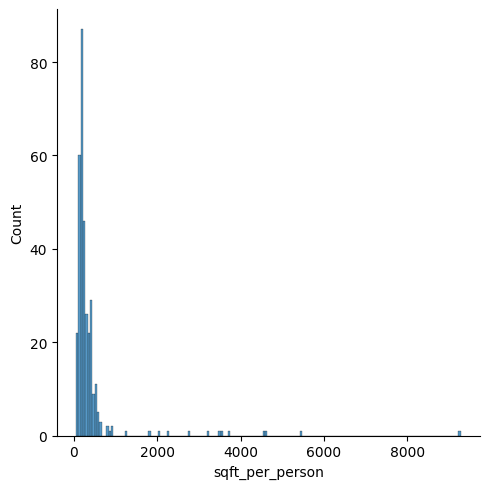

In [67]:
# plot histogram of sqft_per_person
sns.displot(nycha_df['sqft_per_person'])

Those very large numbers don't seem quite right...Let's remember that we computed `"sqft_per_person"` as the ratio between each location's total available area and its number of residents. So it could be that either of those, or both, was inaccurately reported in the dataset. 

**Task 3.1: What are some hypotheses that might explain those inaccuracies? Please write (at least) two:**

> - 3.1 #1: There could be outliers in the data resulting from a development not being completely filled or some other reason
> - 3.1 #2: The data could not yet be clean, containing some oddities that affected the calculationns

**Task 3.2: Now pick one of the three hypotheses you laid out. How would you go about investigating it? Write some ideas here:**
> 3.2: We could investigate outliers by sorting to find which developments gave us this result and then going to the original csv file to check if it was a result of the data not being clean or if it was indeed an outlier

### Constant models
There are techniques and strategies to deal with "[outliers](https://en.wikipedia.org/wiki/Outlier)" in your data. But from now on in this exercise, let's accept those outliers as true and focus on building models to predict `"sqft_per_person"`.

**Task 3.3: start off by building two constant models: one based in the mean and another one based on the median. Use pandas' Series objects built-in methods to compute those two summary statistics of the `"sqft_per_person"` column. Since the models are simply constant values, store them in the python variables `cm_mean` and `cm_median`. Then, print them out.**

In [68]:
# create constant models
cm_mean = nycha_df['sqft_per_person'].mean()
cm_median = nycha_df['sqft_per_person'].median()

# print predictions
print(f"mean sqft per person: {cm_mean}")
print(f"median sqft per person: {cm_median}")

mean sqft per person: 398.3174515872763
median sqft per person: 224.20553359683794


**Task 3.4: You should observe that the mean model predicts a number of square feet per person that's almost double than the median model. Why is that? Write some ideas.**

_Hint: consider the probability distribution you plotted above, and the definition/meaning of mean and median._
 
> 3.4: The mean predicting a number that is double the median means there are a lot of values or potentially outliers that are affecting the mean, whereas the median is less likely to be affected by outliers. In this case we have a handful of very large outliers, which would affect the mean but not be reflected in the mediann.

### Model validation

Okay, so now that you've got your two models, it's time to ask: how well do each of those models predict the actual observed data? 

To answer that question, we need to define _how_ we're going to be measuring "goodness". We'll define two loss functions, the [mean absolute error (MAE)](https://learningds.org/ch/04/modeling_loss_functions.html?highlight=mean%20absolute%20error#mean-absolute-error) and the root mean squared error (RMSE), which is the square root of the [mean squared error (MSE)](https://learningds.org/ch/04/modeling_loss_functions.html?highlight=mean%20absolute%20error#mean-absolute-error).

**Task 3.5: Define two functions to compute RMSE and MAE. Make sure to complete the function docstrings using the [reST style](https://stackoverflow.com/a/24385103).**

In [69]:
# define loss functions

# function to compute mae loss
def mae_loss(y_pred, y_true):
    """
    Function takes a predicted value and an observed value to return the mae

    :param y_pred: A value representing the predicted data
    :param y_true: A value representing the true or observed data
    :returns: Returns the mean of the absolute value of all the errors
    """

    return np.mean(np.abs(y_pred - y_true))

# function to compute rmse loss
def rmse_loss(y_pred, y_true):
    """
    Function takes a predicted value and an observed value to return the rmse

    :param y_pred: A value representing the predicted data
    :param y_true: A value representing the true or observed data
    :returns: Returns the square root of the mean squared error
    """
    return (np.mean((y_pred - y_true)**2)** 0.5)

**Task 3.6: So now we have two loss functions for two models, four combinations in total. Let's compute them into the variables. Then, print them out.**
- `cm_mean_mae`
- `cm_mean_rmse`
- `cm_median_mae`
- `cm_median_rmse`

In [70]:
# compute both loss functions for each model
cm_mean_mae = mae_loss(nycha_df['sqft_per_person'], cm_mean)
cm_mean_rmse = rmse_loss(nycha_df['sqft_per_person'], cm_mean)
cm_median_mae = mae_loss(nycha_df['sqft_per_person'], cm_median)
cm_median_rmse = rmse_loss(nycha_df['sqft_per_person'], cm_median)

In [71]:
# print losses
print("mean constant model MAE:", cm_mean_mae)
print("mean constant model RMSE:", cm_mean_rmse)

print(f"median constant model MAE: {cm_median_mae}")
print(f"median constant model RMSE: {cm_median_rmse}")

mean constant model MAE: 292.8912232585764
mean constant model RMSE: 778.9306654274562
median constant model MAE: 233.52137433708887
median constant model RMSE: 798.1528309350089


Okay, now you may be wondering: "why so many? I only really care about one model and one loss!"

If you were wondering that, you were right. Choosing a loss function is a problem-dependent exercise. In some situations you may want to focus on MAE, and in others in RMSE, as each loss function has different mathematical properties that will affect your final model. For example, RMSE computes the _square_ of the difference between prediction and actual, so if your dataset has points where that difference is very large, the loss will be magnified when taking the square; this does not happen with MAE, which weighs equally every unit of distance between prediction and actual.

### Minimize your loss functions

Let's explore the differences between loss functions by building many constant models and evaluating the loss functions on all of them.

**Task 3.7: Based on the histogram above, it seems reasonable to assume that any constant model $\theta$ that aims to predict `"sqft_per_person"` would be in the 0-1000 range. So let's use [numpy's linspace function](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to define an array `thetas` of values 0, 1, 2, ... 1000, each corresponding to a candiate constant model. Then loop through your `thetas`, computing the MAE and the RMSE for each `theta` value. Store your results as you loop, instantiate a `pandas.DataFrame` (see [constructor docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)) with columns**
- `"theta"`
- `"mae"`
- `"rmse`"

**containing your model values and both loss values at each `theta`. Do all of this in a function `compute_losses(y_true)` that takes in a `pandas.Series` object with the true observations and returns your `pandas.DataFrame` object.**

In [72]:
# function to compute losses over many constant models

def compute_losses(y_true: pd.Series):
    """
    Compute MAE and RMSE losses over a range of theta values.
    
    :param y_true: pandas.Series with true data.
    :returns: pandas.DataFrame with MAE and RMSE values for each theta.
    """
    
    thetas = np.linspace(0, 1000, 1001)
    maes = []
    rmses = []

    for i in thetas:
        predictions = pd.Series(np.full(y_true.shape, i))
        
        mae = mae_loss(y_true, predictions)
        maes.append(mae)
        
        rmse = rmse_loss(y_true, predictions)
        rmses.append(rmse)
    
    result_df = pd.DataFrame({
        'theta': thetas,
        'mae': maes,
        'rmse': rmses
    })
    
    return result_df
    

**Task 3.8: Now call your function, the resulting dataframe in the `losses_df` variable, and display the first few rows.**

In [73]:
# compute losses over many constant models
losses_df = compute_losses(nycha_df['sqft_per_person'])
losses_df.head()

,theta,mae,rmse
0,0.0,398.317452,874.865575
1,1.0,397.317452,874.410738
2,2.0,396.317452,873.956809
3,3.0,395.317452,873.503789
4,4.0,394.317452,873.051679


**Task 3.9: Visualize the losses for each ouf our candidate constant model values, `"theta"` using seaborn's [`lineplot()` function](https://seaborn.pydata.org/generated/seaborn.lineplot.html). Call the function twice within the same cell, for MAE and for RMSE, to plot both curves together. Make sure to pass an argument to the `label` parameter so you can easily distinguish the curves in the plot.. Also, since the y-axis will retain the name of the latest call, call `plt.label()` to rename your y-axis label with the string `"loss"`.**

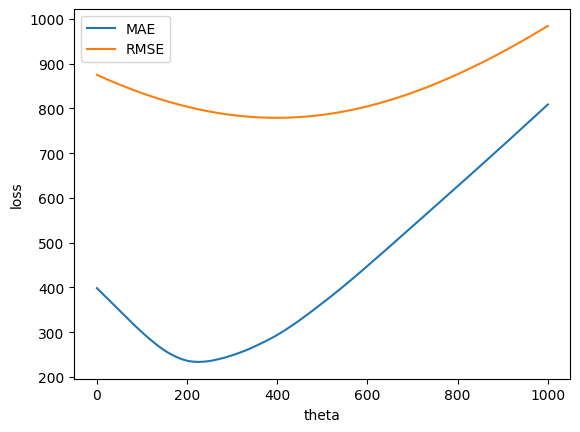

In [74]:
# plot losses at each theta

sns.lineplot(
    x='theta', 
    y='mae', 
    data=losses_df, 
    label="MAE",
)

sns.lineplot(
    x='theta', 
    y='rmse', 
    data=losses_df, 
    label="RMSE",
)

plt.ylabel("loss")
plt.show()

You should observe that the MAE and the RMSE functions have their minima at very different locations. 

**Task 3.10: Let's find them. First, select the row that minimizes `"mae"`. Your output should look something like**

```
theta    123.456789
mae      234.567890
rmse     345.678901
Name: 000, dtype: float64
```
but with different values.

In [75]:
# select row that minimizes MAE
min_mae = losses_df['mae'].idxmin()  
min_mae_row = losses_df.loc[min_mae]  
print(min_mae_row)

theta    224.000000
mae      233.521374
rmse     798.197692
Name: 224, dtype: float64


**Task 3.11: Now do the same but selecting the row that minimizes `"rmse"`.**

In [76]:
# select row that minimizes RMSE
min_rmse = losses_df['rmse'].idxmin()  
min_rmse_row = losses_df.loc[min_rmse]  
print(min_rmse_row)

theta    398.000000
mae      292.705789
rmse     778.930730
Name: 398, dtype: float64


**Task 3.12 Inspect those values. What can you say about them? Are they familiar? Write your observations here:**

> 3.12: The fact that the theta for min rmse and min mae differ so much suggests that the distribution of data is not normal. Min rmse is typically used for large outliers while min mae is more used to compute the average error. Given that rmse is so much higher than the mae, this confirms the presence of outliers and many instances where the predicted values are very far off from the expected values.

### Choosing a model
You have built a set of candidate models and found the two that minimize your loss functions under consideration, MAE and RMSE. But eventually, to put a model to practical use you have to choose a single model $\theta$. 

**Task 3.13: Which one would you choose? The model that minimizes MAE or the model that minimizes RMSE? Explain your choice:**
> 3.13: In this case I believe min rmse is a better fit because it properly represents the effect that the outliers have on the data. 

## Final check before submission: ensure your notebook runs in one go!
You've been programming in an interactive environment, and you may have leftover variables or functions in your namespace. Before submitting you want to ensure that your notebook executes from beginning to end in a clean kernel. 

Final task: Navigate to the "Kernel" tab above and hit "Restart Kernel and Run All Cells...". Confirm by hitting "Restart" and wait a few seconds until your code has finished running. If any cell errors out, fix your bug and repeat this process until your notebook runs completely without errors.